In [131]:
import nasdaqdatalink as quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from common import date_util
from data import investment_universe, sharadar_fundamentals, sharadar_prices, sharadar_tickers
from datetime import date, datetime, timedelta

In [132]:
quandl.ApiConfig.api_key = 'NRvcyMwNMXZ2ooDSM3nw'

In [143]:
dates = []
universe_size = []
prices_size = []
sector_size = []
coverage_size = []

unmapped_tickers = {}

rebal_date = date(2000, 1, 1)
while rebal_date <= date(2021, 12, 31):
    rebal_date = date_util.get_next_rebal_day(rebal_date, 3)
    dates.append(rebal_date)
    
    universe = investment_universe.get_SPX(rebal_date)
    universe_size.append(universe.shape[0])
    prices = sharadar_prices.get_prices(universe['ticker'].to_list(), rebal_date)
    prices_size.append(prices.shape[0])
    sectors = sharadar_tickers.get_tickers(universe['ticker'].to_list(), rebal_date)
    sector_size.append(sectors.shape[0])
    fundamentals = sharadar_fundamentals.get_fundamentals(universe['ticker'].to_list(), rebal_date)
    coverage_size.append(fundamentals.shape[0])

    df = pd.merge(left=sectors, right=fundamentals, left_on="ticker", right_on="ticker", how="left")
    tickers = df.loc[df["dimension"].isna(), "ticker"].to_list()
    if tickers:
        unmapped_tickers[rebal_date] = df.loc[df["dimension"].isna(), "ticker"].to_list()

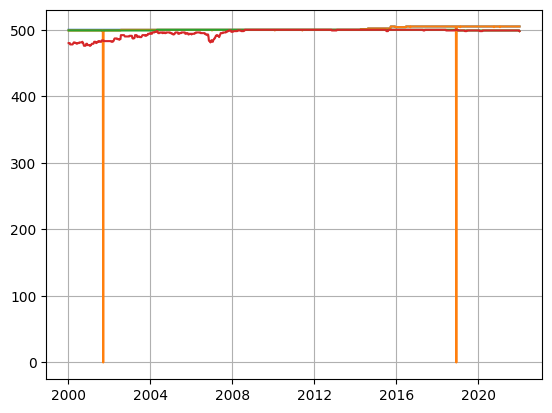

In [134]:
plt.plot(dates, universe_size)
plt.plot(dates, prices_size)
plt.plot(dates, sector_size)
plt.plot(dates, coverage_size)
plt.grid()

In [135]:
data_df = pd.DataFrame({"date": dates, "universe_size": universe_size, "prices_size": prices_size, "sector_size": sector_size, "coverage_size": coverage_size})

In [136]:
data_df[data_df["coverage_size"] < data_df["sector_size"]]

,date,universe_size,prices_size,sector_size,coverage_size
0,2000-01-05,500,499,499,480
1,2000-01-12,500,499,499,480
2,2000-01-19,500,499,499,480
3,2000-01-26,500,499,499,480
4,2000-02-02,500,499,499,478
...,...,...,...,...,...
1049,2020-02-12,505,505,499,498
1050,2020-02-19,505,505,499,498
1051,2020-02-26,505,505,499,498
1052,2020-03-04,505,505,499,498


In [137]:
universe = investment_universe.get_SPX(date(2020, 3, 11))
universe.head()

,Unnamed: 0,date,action,ticker,name,contraticker,contraname,note
0,0,2019-12-31,historical,ZTS,ZOETIS INC,NaN,NaN,NaN
1,1,2019-12-31,historical,ZION,ZIONS BANCORPORATION NATIONAL ASSOCIATION,NaN,NaN,NaN
2,2,2019-12-31,historical,ZBRA,ZEBRA TECHNOLOGIES CORP,NaN,NaN,NaN
3,3,2019-12-31,historical,ZBH,ZIMMER BIOMET HOLDINGS INC,NaN,NaN,NaN
4,4,2019-12-31,historical,YUM,YUM BRANDS INC,NaN,NaN,NaN


In [138]:
sectors = sharadar_tickers.get_tickers(universe['ticker'].to_list(), date(2020, 3, 11))
sectors.head()

,None,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
0,0,SF1,199997,ABT,ABBOTT LABORATORIES,NYSE,N,Domestic Common Stock,002824100,2834,...,USD,Illinois; U.S.A,2023-11-01,2014-09-23,1986-01-01,2023-11-10,1994-12-31,2023-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.abbott.com
1,1,SF1,199991,AMD,ADVANCED MICRO DEVICES INC,NASDAQ,N,Domestic Common Stock,007903107,3674,...,USD,California; U.S.A,2023-11-01,2014-10-30,1986-01-01,2023-11-10,1995-12-31,2023-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.amd.com
2,2,SF1,199989,APD,AIR PRODUCTS & CHEMICALS INC,NYSE,N,Domestic Common Stock,009158106 009158403,2810,...,USD,Pennsylvania; U.S.A,2023-08-03,2014-09-23,1986-01-01,2023-11-10,1995-12-31,2023-06-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.airproducts.com
3,3,SF1,199979,SWKS,SKYWORKS SOLUTIONS INC,NASDAQ,N,Domestic Common Stock,83088M102 020753109,3674,...,USD,California; U.S.A,2023-08-08,2014-10-30,1986-01-01,2023-11-10,1995-12-31,2023-06-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.skyworksinc.com
4,4,SF1,199977,HWM,HOWMET AEROSPACE INC,NYSE,N,Domestic Common Stock Primary Class,013817101 03965L100 443201108 022249106 013817507,3350,...,USD,Pennsylvania; U.S.A,2023-11-02,2014-10-23,1986-01-01,2023-11-10,1992-12-31,2023-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.howmet.com


In [139]:
fundamentals = sharadar_fundamentals.get_fundamentals(universe['ticker'].to_list(), date(2020, 3, 11))
fundamentals.head()

,None,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,0,ZTS,ARQ,2019-12-31,2020-02-13,2019-12-31,2023-08-08,-726000000,11545000000,NaN,...,474933945,476412000,480248000.0,3.514,7063000000,88000000,53000000,727000000,14.825,2.942000e+09
1,2,ZION,ARQ,2019-12-31,2020-02-26,2019-12-31,2023-08-07,43000000,69172000000,NaN,...,164919353,166981000,179331000.0,4.234,68158000000,0,52000000,0,408.178,NaN
2,4,ZBRA,ARQ,2019-12-31,2020-02-13,2019-12-31,2023-10-31,-44000000,4711000000,NaN,...,54008653,54008653,NaN,22.071,1814000000,159000000,10000000,38000000,33.587,-2.090000e+08
3,6,ZBH,ARQ,2019-12-31,2020-02-21,2019-12-31,2023-08-01,-241900000,24638700000,NaN,...,206403646,206000000,207900000.0,10.319,7781400000,0,-32200000,1651900000,37.774,1.282400e+09
4,8,YUM,ARQ,2019-12-31,2020-02-20,2019-12-31,2023-08-07,-388000000,5231000000,NaN,...,300822322,300822322,NaN,5.631,4457000000,447000000,-91000000,150000000,14.816,-1.400000e+07


In [140]:
df = pd.merge(left=sectors, right=fundamentals, left_on="ticker", right_on="ticker", how="left")
df.head()

,None_x,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,0,SF1,199997,ABT,ABBOTT LABORATORIES,NYSE,N,Domestic Common Stock,002824100,2834,...,1.763433e+09,1.768045e+09,1.781591e+09,4.702,2.766700e+10,3.079000e+09,191000000.0,226000000.0,15.648,4.804000e+09
1,1,SF1,199991,AMD,ADVANCED MICRO DEVICES INC,NASDAQ,N,Domestic Common Stock,007903107,3674,...,1.169662e+09,1.139000e+09,1.159000e+09,1.867,5.739000e+09,0.000000e+00,35000000.0,0.0,5.039,2.238000e+09
2,2,SF1,199989,APD,AIR PRODUCTS & CHEMICALS INC,NYSE,N,Domestic Common Stock,009158106 009158403,2810,...,2.206785e+08,2.209000e+08,2.222000e+08,10.207,1.841960e+10,0.000000e+00,120700000.0,923900000.0,83.384,2.900700e+09
3,3,SF1,199979,SWKS,SKYWORKS SOLUTIONS INC,NASDAQ,N,Domestic Common Stock,83088M102 020753109,3674,...,1.701552e+08,1.702000e+08,1.716000e+08,5.265,3.805500e+09,3.990000e+07,21600000.0,309500000.0,22.359,2.013300e+09
4,4,SF1,199977,HWM,HOWMET AEROSPACE INC,NYSE,N,Domestic Common Stock Primary Class,013817101 03965L100 443201108 022249106 013817507,3350,...,4.359186e+08,4.310000e+08,4.870000e+08,7.891,1.242700e+10,6.080000e+08,-5000000.0,87000000.0,28.833,1.716000e+09


In [141]:
df.loc[df["dimension"].isna()]

,None_x,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
19,19,SF1,199910,BAX,BAXTER INTERNATIONAL INC,NYSE,N,Domestic Common Stock,071813109 071813141,3841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# unmapped_tickers
# CMCSK
# DISCK 
# FOX B share
# FRCB regulated by FDIC
# GOOG C share
# NWS B share
# PCS1
# SBNY regulated by FDIC
# TFCFA
# UA C share

{'CMCSK', 'DISCK', 'FOX', 'FRCB', 'GOOG', 'NWS', 'PCS1', 'SBNY', 'TFCFA', 'UA'}

In [144]:
for k, v in unmapped_tickers.items():
    print(k)
    print(v)

2000-01-05
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'GP1']
2000-01-12
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'GP1']
2000-01-19
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'GP1']
2000-01-26
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'GP1']
2000-02-02
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'VMC', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'OAT', 'GP1']
2000-02-09
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'VMC', 'NRTLQ', 'WWY', 'SHEL', 'GOLD', 'UL', 'INCLF', 'PDG', 'OAT', 'GP1']
2000-02-16
['ADM', 'LOW', 'WY', 'JNJ', 'FNMA', 'CA', 'NAV', 'FMCC', 'AET', 'X', 'RF', 'VMC